In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import copulae as cp
from copulae.core import pseudo_obs

In [258]:
data = pd.read_csv('stocks.csv', index_col=0)
X = - np.log(data).diff()[1:]
X.head()
X.corr()

,AAPL,AMZN,HD,INTC,MA,MSFT,PEP,PG,T,V
AAPL,1.000000,0.404083,0.464688,0.501691,0.540024,0.539861,0.385429,0.353143,0.351627,0.506755
AMZN,0.404083,1.000000,0.381549,0.383956,0.508353,0.509672,0.289858,0.236675,0.247640,0.477392
HD,0.464688,0.381549,1.000000,0.520333,0.582206,0.541982,0.564048,0.438530,0.466784,0.581013
INTC,0.501691,0.383956,0.520333,1.000000,0.524270,0.629503,0.474764,0.387180,0.406537,0.508999
MA,0.540024,0.508353,0.582206,0.524270,1.000000,0.619254,0.483506,0.432472,0.429475,0.853072
MSFT,0.539861,0.509672,0.541982,0.629503,0.619254,1.000000,0.492929,0.438476,0.405655,0.613208
PEP,0.385429,0.289858,0.564048,0.474764,0.483506,0.492929,1.000000,0.686861,0.518048,0.486449
PG,0.353143,0.236675,0.438530,0.387180,0.432472,0.438476,0.686861,1.000000,0.492106,0.433376
T,0.351627,0.247640,0.466784,0.406537,0.429475,0.405655,0.518048,0.492106,1.000000,0.416323
V,0.506755,0.477392,0.581013,0.508999,0.853072,0.613208,0.486449,0.433376,0.416323,1.000000


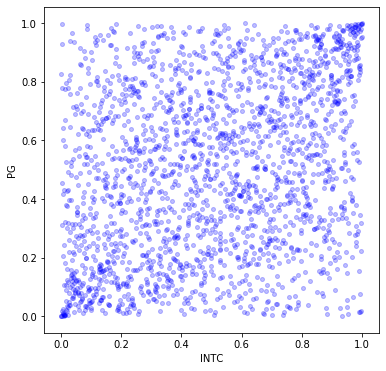

In [267]:
real = pseudo_obs(X[['INTC', 'PG']])

plt.figure(figsize=(6,6))
plt.scatter(real[:,0], real[:,1], s=16, color='blue', alpha=0.25)
plt.xlabel('INTC')
plt.ylabel('PG')
plt.savefig('copula_plots/intc_pg_real.png', dpi=150)

gauss
Log-likelihood: 120.90194226386375
Params: [0.33074108]


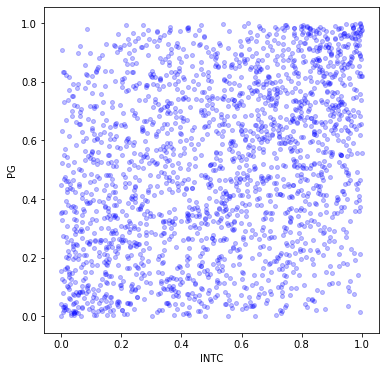

studentst
Log-likelihood: 164.91768017168062
Params: StudentParams(df=4.472546510983751, rho=array([0.3296144]))


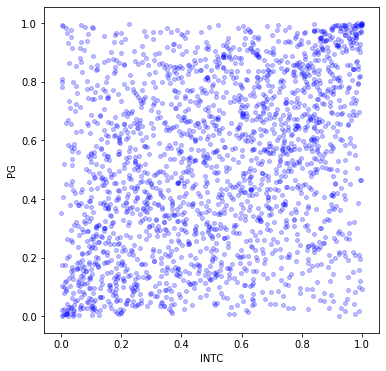

clayton
Log-likelihood: 105.56613605953714
Params: 0.4286481282291481


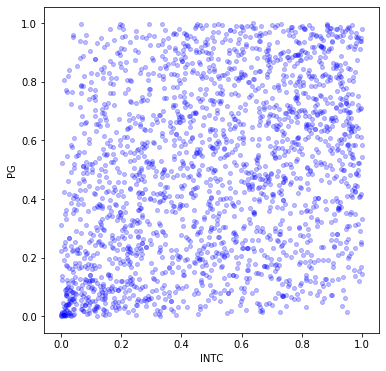

frank
Log-likelihood: 106.59249136184374
Params: 2.0053981459351577


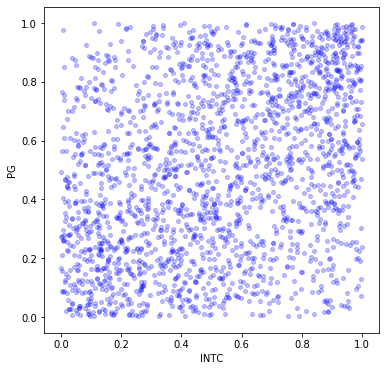

gumbel
Log-likelihood: 137.57962528997004
Params: 1.265285880225934


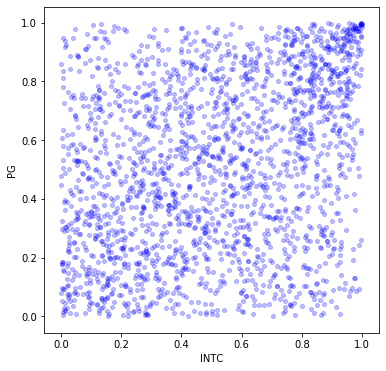

In [268]:
methods = {'gauss': cp.GaussianCopula,
           'studentst': cp.StudentCopula,
           'clayton': cp.ClaytonCopula,
           'frank': cp.FrankCopula,
           'gumbel': cp.GumbelCopula}

for name, method in methods.items():
    copula = method(2)
    copula.fit(X[['INTC', 'PG']], optim_options={'method': 'BFGS'})
    print(name)
    print(f'Log-likelihood: {copula.log_lik(X[["INTC", "PG"]])}')
    print(f'Params: {copula.params}')
    
    synth = copula.random(len(X))
    plt.show()
    plt.figure(figsize=(6,6))
    plt.scatter(synth[:,0], synth[:,1], s=16, color='blue', alpha=0.25)
    plt.xlabel('INTC')
    plt.ylabel('PG')
    plt.savefig(f'copula_plots/intc_pg_{name}.png', dpi=150)
    plt.show()